In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from codes.transcription.utils import from_midi_tags, plot_pianoroll
import os
from pretty_midi import pretty_midi
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import random
import pandas as pd

# 1. Audios .wav y MIDIs

In [2]:
wavs = []
midislike = []
midis = []

for root, _, files in os.walk('music-transcription'):
    for file in files:
        path = os.path.join(root,file)
        if 'wav' in path:
            wavs.append(path)
        elif 'midi-like' in path:
            midislike.append(path)
        elif 'midi' in path:
            midis.append(path)

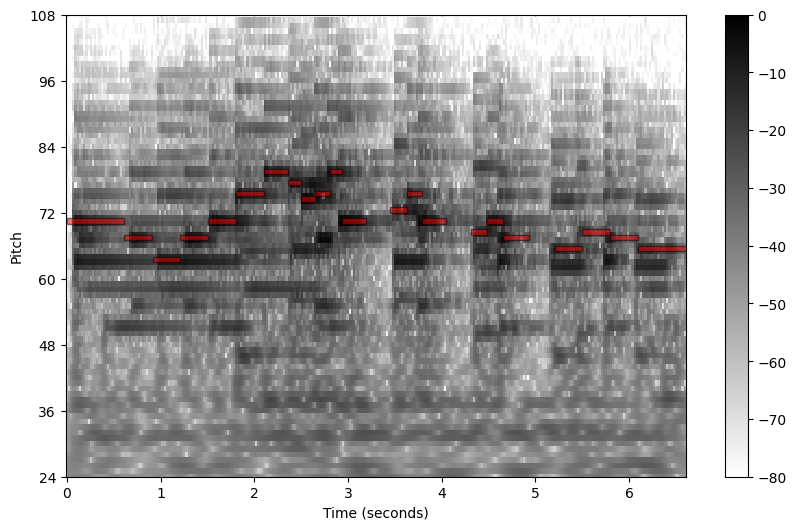

In [3]:
sr = 22050
H = 512
idx = random.randint(0,len(wavs))

# --------------
# Mostrar audios
# --------------

wav, _ = librosa.load(wavs[idx],sr=sr,mono=True)
wav = wav / np.abs(wav).max()
midi_obj = pretty_midi.PrettyMIDI(midis[idx])
midi = midi_obj.synthesize(fs=sr,wave=np.sin)
n_samples = min(midi.shape[0], wav.shape[0])
mixed = np.stack((wav[:n_samples],midi[:n_samples]),axis=1).T

ipd.display(ipd.Audio(data=wav,rate=sr))
ipd.display(ipd.Audio(data=midi,rate=sr))
ipd.display(ipd.Audio(data=mixed,rate=sr))

# ---------------------
# Mostrar espectrograma
# ---------------------

events = {
    'Start':[],
    'Duration':[],
    'Pitch':[]
}

X = librosa.cqt(wav, sr=sr, fmin=librosa.midi_to_hz(0), bins_per_octave=12, n_bins=9*12, hop_length=H)
D = librosa.amplitude_to_db(np.abs(X), ref=np.max)

for note in midi_obj.instruments[0].notes:
    events['Start'] += [note.start]
    events['Duration'] += [note.get_duration()]
    events['Pitch'] += [note.pitch]
    
df = pd.DataFrame(events)
fig = plt.figure(figsize=(10, 6))

librosa.display.specshow(D, cmap='gray_r', x_axis='s', sr=sr, hop_length=H)
plt.colorbar()

plt.yticks(np.arange(0, D.shape[0] + 1, 12))
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.ylim(bottom=24)
plot_pianoroll(df, set_lims=False, centric=False, labels=False,
               rect_args={'facecolor': 'red', 'edgecolor': 'k', 'alpha': 0.5})

# 2. Tokens

In [4]:
midi_obj.instruments[0].notes

[Note(start=0.000000, end=0.608333, pitch=70, velocity=60),
 Note(start=0.608333, end=0.912500, pitch=67, velocity=60),
 Note(start=0.914583, end=1.212500, pitch=63, velocity=60),
 Note(start=1.212500, end=1.510417, pitch=67, velocity=60),
 Note(start=1.510417, end=1.802083, pitch=70, velocity=60),
 Note(start=1.804167, end=2.100000, pitch=75, velocity=60),
 Note(start=2.102083, end=2.356250, pitch=79, velocity=60),
 Note(start=2.358333, end=2.504167, pitch=77, velocity=60),
 Note(start=2.504167, end=2.643750, pitch=74, velocity=60),
 Note(start=2.643750, end=2.808333, pitch=75, velocity=60),
 Note(start=2.808333, end=2.935417, pitch=79, velocity=60),
 Note(start=2.935417, end=3.195833, pitch=70, velocity=60),
 Note(start=3.454167, end=3.631250, pitch=72, velocity=60),
 Note(start=3.631250, end=3.793750, pitch=75, velocity=60),
 Note(start=3.795833, end=4.052083, pitch=70, velocity=60),
 Note(start=4.308333, end=4.479167, pitch=68, velocity=60),
 Note(start=4.479167, end=4.660417, pitc

In [5]:
tokens = from_midi_tags()
tokenizer = Tokenizer(filters='', lower=False)  
tokenizer.fit_on_texts(tokens)
tokenizer.word_index

{'BOS': 1,
 'NoteOn_21': 2,
 'NoteOn_22': 3,
 'NoteOn_23': 4,
 'NoteOn_24': 5,
 'NoteOn_25': 6,
 'NoteOn_26': 7,
 'NoteOn_27': 8,
 'NoteOn_28': 9,
 'NoteOn_29': 10,
 'NoteOn_30': 11,
 'NoteOn_31': 12,
 'NoteOn_32': 13,
 'NoteOn_33': 14,
 'NoteOn_34': 15,
 'NoteOn_35': 16,
 'NoteOn_36': 17,
 'NoteOn_37': 18,
 'NoteOn_38': 19,
 'NoteOn_39': 20,
 'NoteOn_40': 21,
 'NoteOn_41': 22,
 'NoteOn_42': 23,
 'NoteOn_43': 24,
 'NoteOn_44': 25,
 'NoteOn_45': 26,
 'NoteOn_46': 27,
 'NoteOn_47': 28,
 'NoteOn_48': 29,
 'NoteOn_49': 30,
 'NoteOn_50': 31,
 'NoteOn_51': 32,
 'NoteOn_52': 33,
 'NoteOn_53': 34,
 'NoteOn_54': 35,
 'NoteOn_55': 36,
 'NoteOn_56': 37,
 'NoteOn_57': 38,
 'NoteOn_58': 39,
 'NoteOn_59': 40,
 'NoteOn_60': 41,
 'NoteOn_61': 42,
 'NoteOn_62': 43,
 'NoteOn_63': 44,
 'NoteOn_64': 45,
 'NoteOn_65': 46,
 'NoteOn_66': 47,
 'NoteOn_67': 48,
 'NoteOn_68': 49,
 'NoteOn_69': 50,
 'NoteOn_70': 51,
 'NoteOn_71': 52,
 'NoteOn_72': 53,
 'NoteOn_73': 54,
 'NoteOn_74': 55,
 'NoteOn_75': 56,
 'NoteO

# 3. Modelo

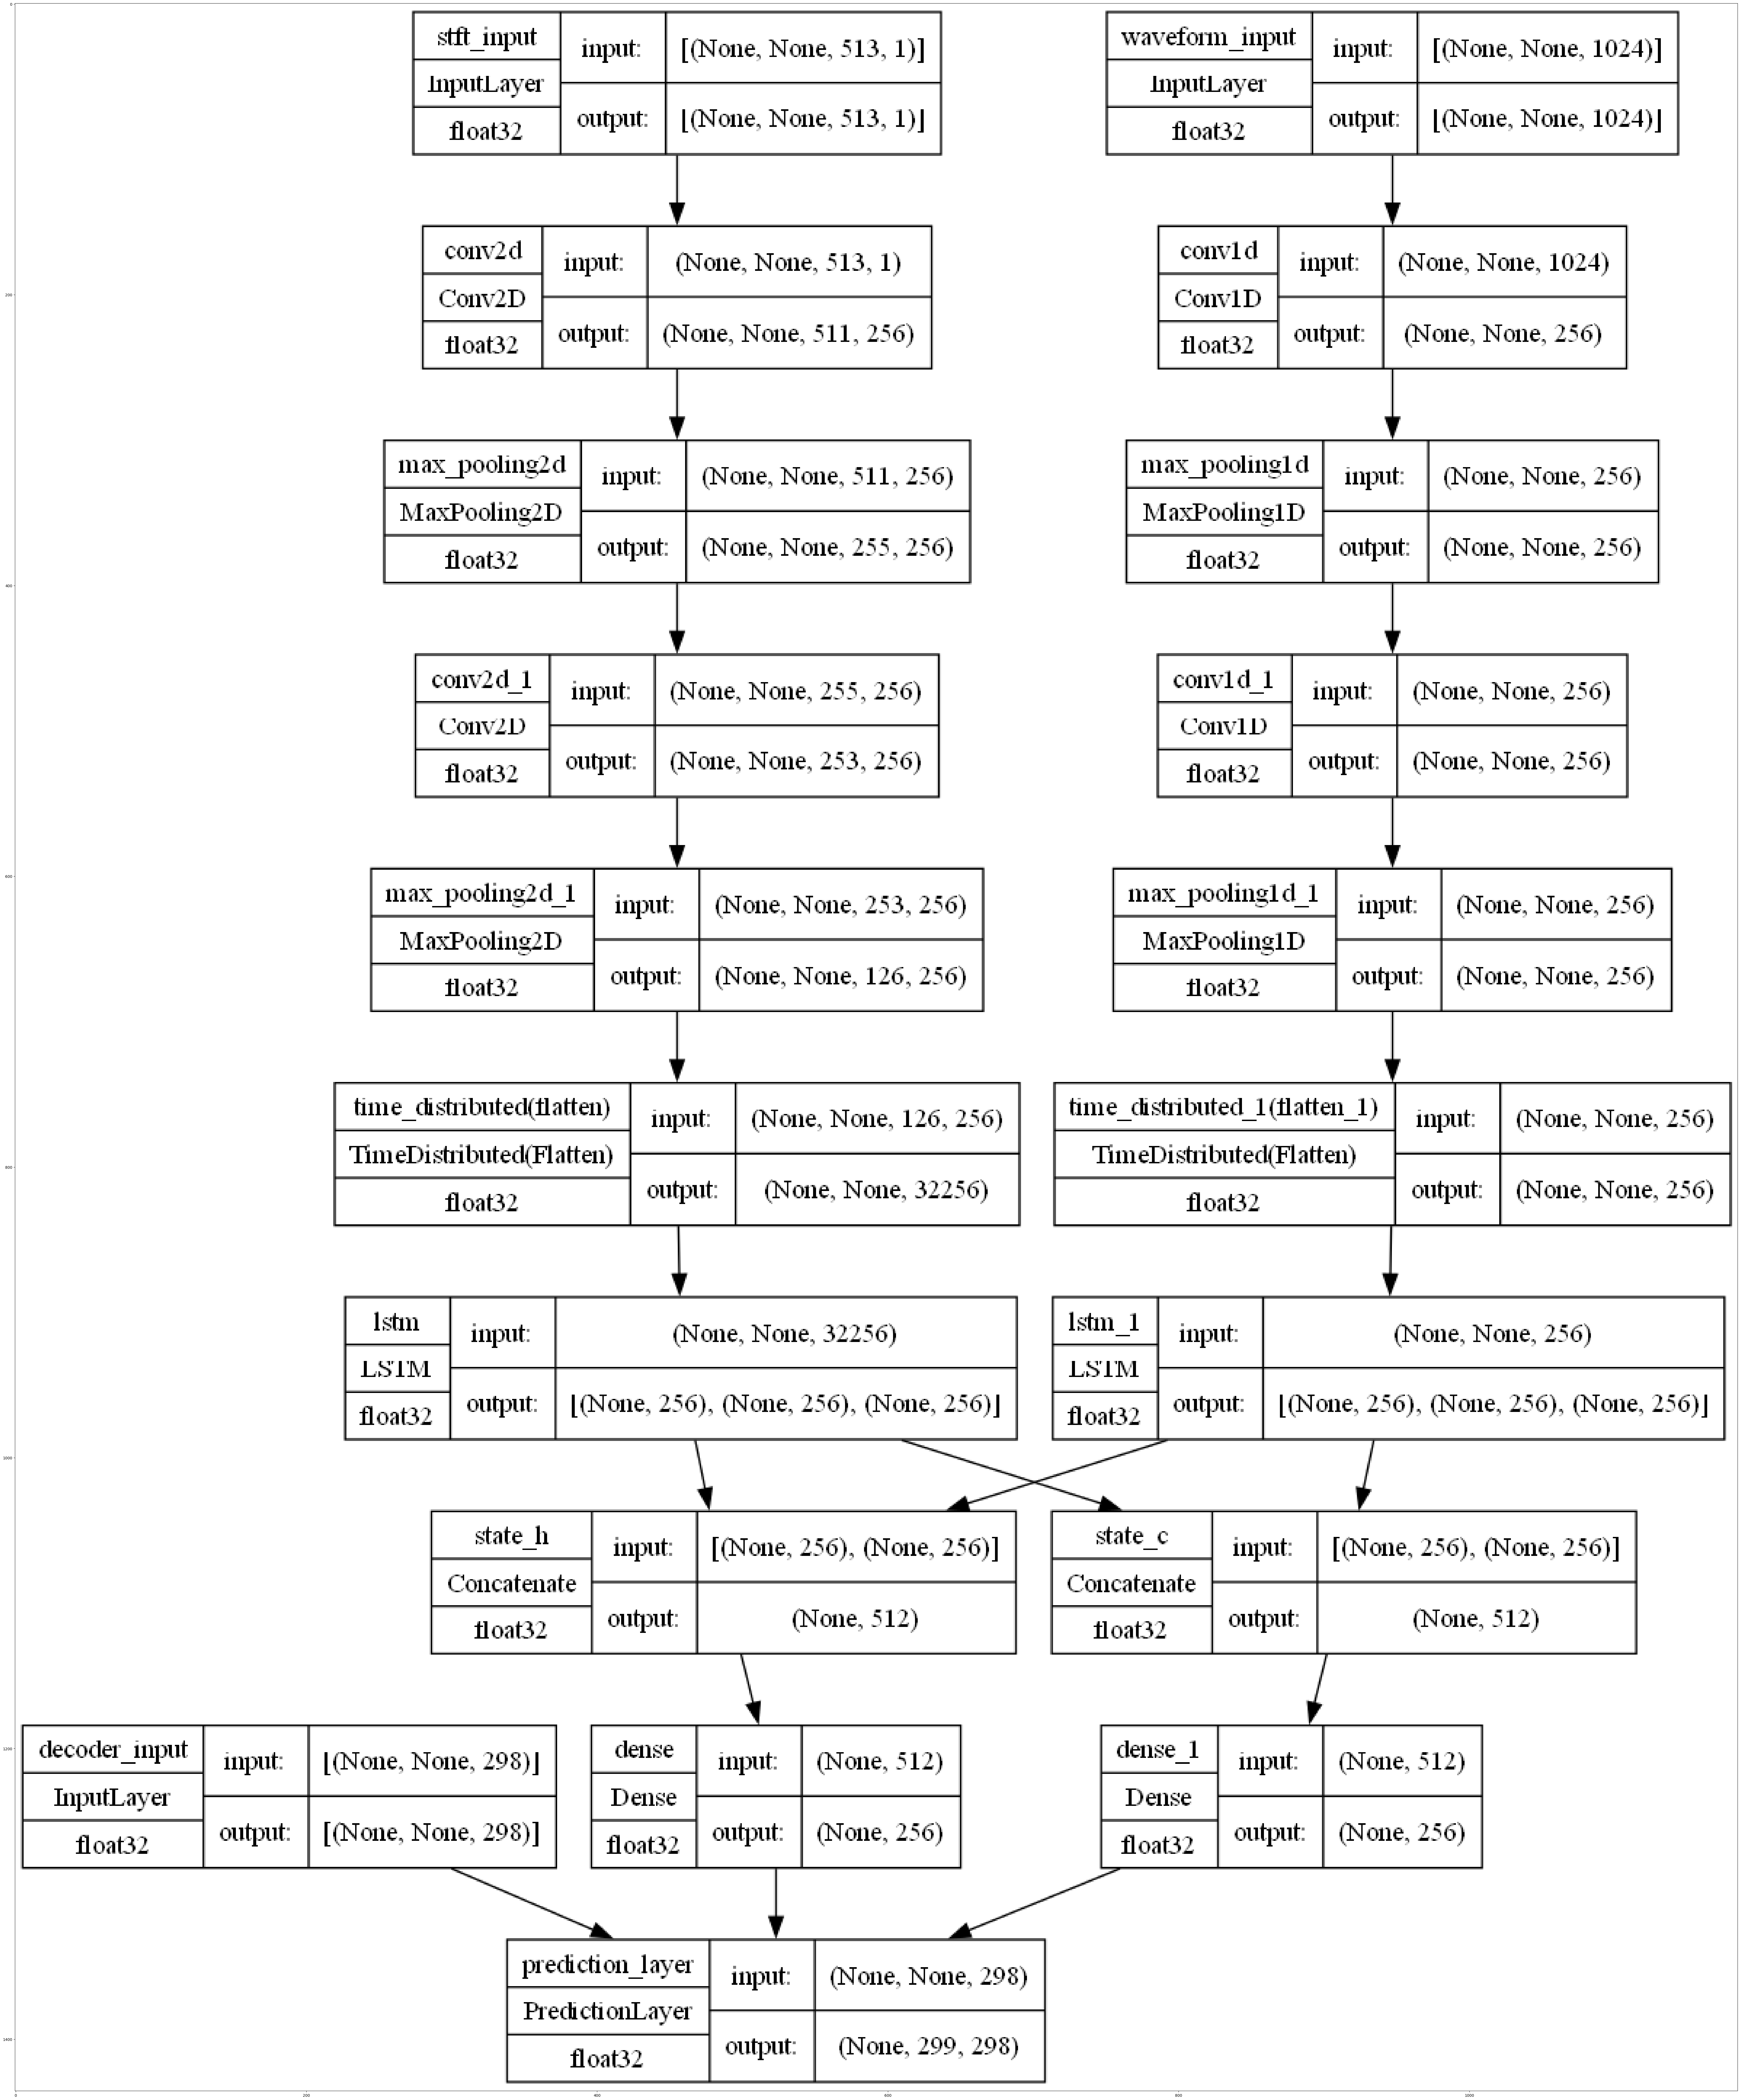

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 stft_input (InputLayer)        [(None, None, 513,   0           []                               
                                1)]                                                               
                                                                                                  
 waveform_input (InputLayer)    [(None, None, 1024)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, None, 511, 2  2560        ['stft_input[0][0]']             
                                56)                                                         

In [1]:
from codes.transcription import model
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

transcriptor = model.EncoderDecoderModel()
transcriptor.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

tf.keras.utils.plot_model(
    transcriptor.build_graph(),
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB"
)

img = cv.cvtColor(cv.imread('model.png'),cv.COLOR_BGR2RGB)
fig = plt.figure(figsize=(100,100))
plt.imshow(img)
plt.show()

transcriptor.build_graph().summary()